<a href="https://colab.research.google.com/github/mrithullapadmanabhan/assistive-e-learning/blob/main/object_counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

total object count:  8


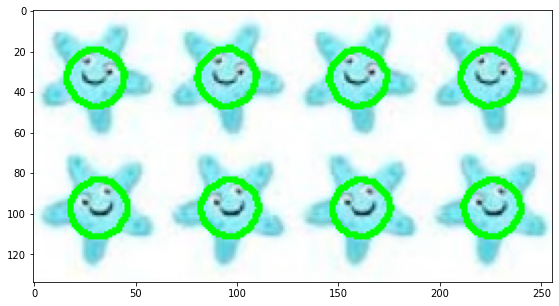

In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

inputimg = cv2.imread("starfish.jpeg")

# Read the image and apply filter and threshold
    
image = inputimg
image_blur = cv2.medianBlur(image,25) #a pixel will be assigned with the average of 25 pixels
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY) #convert to grayscale
image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV) #set values under 1 to be 0 and otherwise 1
kernel = np.ones((3,3),np.uint8) #have a 3*3 kernal

opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) #erosion followed by dilation

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) 
ret, last_image = cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0) #thrsholding
last_image = np.uint8(last_image)  #to numpy array


cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #find contours
cnts = imutils.grab_contours(cnts) #get the contour points



#count and draw circle using the contour points
for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2) #connect the curve regions

print("total object count: ",len(cnts))

f, axs = plt.subplots(1,figsize=(12,5)) #display the image
axs.imshow(image,cmap="gray")

In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and preprocess the data
data = pd.read_csv("students.csv")

# Encode the target labels
encoder = LabelEncoder()
data['learning_rate'] = encoder.fit_transform(data['learning_rate'])

# Split the data into training and testing sets
X = data.drop('learning_rate', axis=1)
y = data['learning_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train, y_train)

# Predict the learning rates of students in the test set
y_pred = mlp.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9375


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# Backprop on the Seeds Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp
lookup1 = dict()

def myfunct(dataset,test_data, algorithm, n_folds, *args):
  print("myfunc")
  predicted = algorithm(dataset, test_data[0], *args)
  return predicted

# Load a CSV file
# def load_csv(filename):
#   print("mydataset")
# 	dataset = list()
# 	with open(filename, 'r') as file:
# 		csv_reader = reader(file)
# 		for row in csv_reader:
# 			if not row:
# 				continue
# 			dataset.append(row)
# 	return dataset
def load_csv(filename):
  print("mydataset")
  dataset = list()
  with open(filename, 'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
        if not row:
          continue
        dataset.append(row)
  return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
  print("str_column_to_float")
  for row in dataset:
    row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
  print("str_column_to_int")
  class_values = [row[column] for row in dataset]
  unique = set(class_values)
  #print(unique)
  lookup = dict()
  for i, value in enumerate(unique):
    lookup[value] = i
	#print(lookup)
  lookup1=lookup
  for row in dataset:
    row[column] = lookup[row[column]]
  return lookup

# Find the min and max values for each column
def dataset_minmax(dataset):
  print("dataset_minmax")
  minmax = list()
  stats = [[min(column), max(column)] for column in zip(*dataset)]
  return stats

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
  print("normalize_dataset")
  for row in dataset:
    for i in range(len(row)-1):
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
  print("cross_validation_split")
  dataset_split = list()
  dataset_copy = list(dataset)
  fold_size = int(len(dataset) / n_folds)
  for i in range(n_folds):
    fold = list()
    while len(fold) < fold_size:
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
  return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
  print("accuracy_metric")
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  print("evaluate_algorithm")
  folds = cross_validation_split(dataset, n_folds)
  scores = list()
  for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None
    #print(train_set)
    predicted = algorithm(train_set, [1.0,1.0,1.0,1.0,1.0,1.0,None], *args)
    #actual = [row[-1] for row in fold]
    print("predicted",predicted)
    #print("actual",actual)
    #accuracy = accuracy_metric(actual, predicted)
    #scores.append(accuracy)
  return 5

# Calculate neuron activation for an input
def activate(weights, inputs):
  print("activate")
  activation = weights[-1]
  for i in range(len(weights)-1):
    activation += weights[i] * inputs[i]
  return activation

# Transfer neuron activation
def transfer(activation):
  print("transfer")
  return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
  print("forward propagate")
  inputs = row
  for layer in network:
    new_inputs = []
    for neuron in layer:
      activation = activate(neuron['weights'], inputs)
      neuron['output'] = transfer(activation)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
  print("transfer_derivative")
  return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
  print("backward_propagate_error")
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()
    if i != len(network)-1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else:
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
  print("update weight")
  for i in range(len(network)):
    inputs = row[:-1]
    if i != 0:
      inputs = [neuron['output'] for neuron in network[i - 1]]
    for neuron in network[i]:
      for j in range(len(inputs)):
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
  print("train_network")
  for epoch in range(n_epoch):
    for row in train:
      outputs = forward_propagate(network, row)
      expected = [0 for i in range(n_outputs)]
      expected[row[-1]] = 1
      backward_propagate_error(network, expected)
      update_weights(network, row, l_rate)

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
  print("initialize_network")
  network = list()
  hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
  network.append(hidden_layer)
  output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
  network.append(output_layer)
  return network

# Make a prediction with a network
def predict(network, row):
  print("predict")
  outputs = forward_propagate(network, row)
  #print(row)
  #print(outputs.index(max(outputs)))
  return outputs.index(max(outputs))

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
  print("back_propagation")
  n_inputs = len(train[0]) - 1
  n_outputs = len(set([row[-1] for row in train]))
  network = initialize_network(n_inputs, n_hidden, n_outputs)
  train_network(network, train, l_rate, n_epoch, n_outputs)
  predictions = list()
  #for row in test:
  prediction = predict(network, test)
  #predictions.append(prediction)
  return(prediction)

def start(test_data):
  print("start")
  # Test Backprop on Seeds dataset
  seed(1)
  # load and prepare data
  filename = 'slchildren1.csv'
  dataset = load_csv(filename)
  for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
  # convert class column to integers
  lookup1=str_column_to_int(dataset, len(dataset[0])-1)
  # normalize input variables
  minmax = dataset_minmax(dataset)
  normalize_dataset(dataset, minmax)
  # evaluate algorithm
  n_folds = 5
  l_rate = 0.3
  n_epoch = 500
  n_hidden = 5
  normalize_dataset(test_data, minmax)
  test_data[0].append(None)
  key = myfunct(dataset,test_data, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
  for level, L in lookup1.items():
    if L == key:
        # print(level)
      return(level)
  return("error")

In [13]:
level=start([[float(3),float(2),float(3),float(4),float(5),float(1)]])
print(level)

Streaming output truncated to the last 5000 lines.
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
backward_propagate_error
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
update weight
forward propagate
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
backward_propagate_error
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
transfer_derivative
update weight
forward propagate
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activate
transfer
activat